In [184]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_openml
pd.set_option('display.max_columns', None)
from pathlib import Path

**Descritpion**
1. survival - Survival(0=No; 1=Yes)
2. pclass - Passenger Class(1=1st,2=2nd,3=3rd)
3. name - Name
4. sex - Sex
5. age - Age
6. sibsp - Number of Siblings/Spouse Aboard
7. parch - Number of Parents/Children Aboard
8. ticket - Ticket Number
9. fare - Passenger Fare
10. cabin - Cabin
11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
12. boat - Lifeboat(if survived)
13. body - Body Identification Number (if did not survive and body was recovered)
14. home.dest - Home/Destination

In [185]:
titanic = fetch_openml(data_id = 40945) 
df = titanic['data']
df[titanic.target_names[0]] = titanic.target
file_path = Path(os.path.join('data','data.csv'))
df.to_csv(file_path, index=False)

In [186]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


In [189]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: >

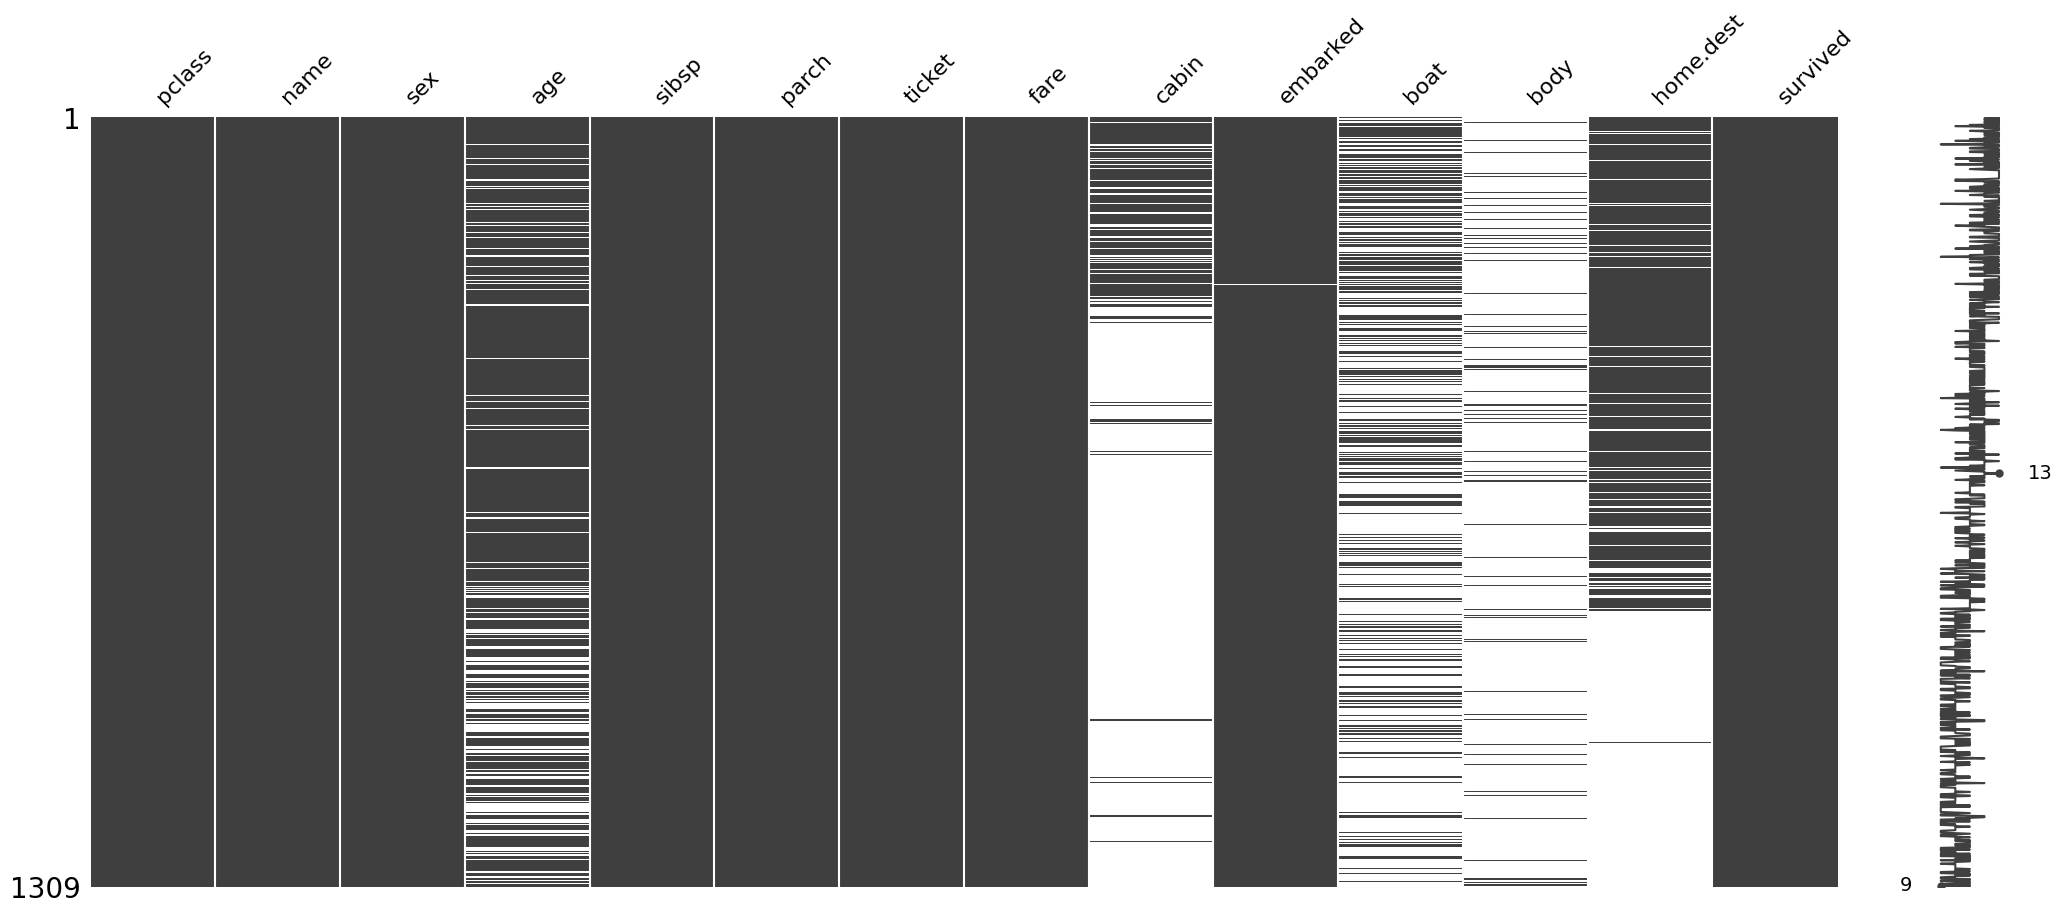

In [190]:
msno.matrix(df)

In [191]:
df['survived'] = df['survived'].astype('int16')
df[['sex','survived']].groupby(['sex'],as_index=False).mean()

,sex,survived
0,female,0.727468
1,male,0.190985


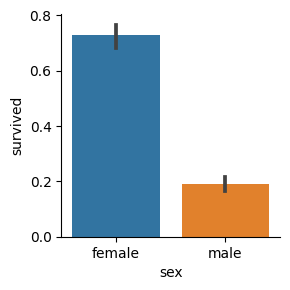

In [192]:
sns.catplot(x='sex',y='survived',data=df,kind='bar',height=3)

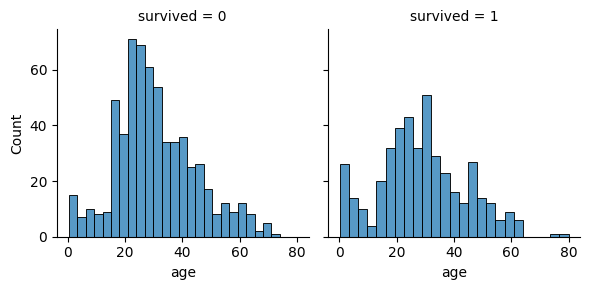

In [193]:
sns.FacetGrid(df,col='survived').map(sns.histplot,'age',bins=25)

<Axes: ylabel='age'>

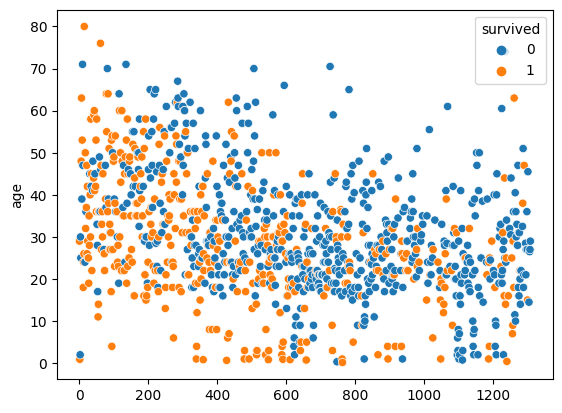

In [194]:
sns.scatterplot(x = df.index, y = 'age' , hue= 'survived',data=df )

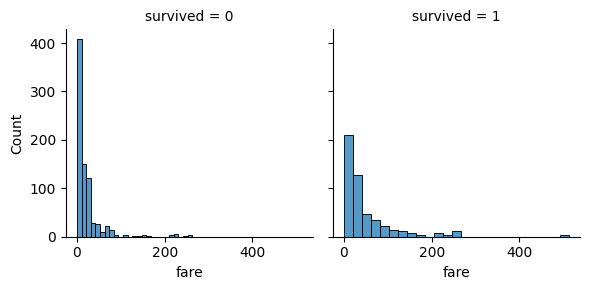

In [195]:
sns.FacetGrid(df,col='survived').map(sns.histplot,'fare',bins=25)

<Axes: xlabel='fare', ylabel='age'>

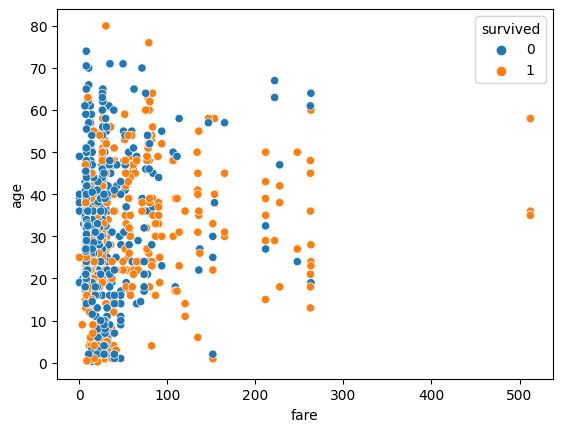

In [196]:
sns.scatterplot(x = 'fare', y = 'age' , hue= 'survived',data=df )

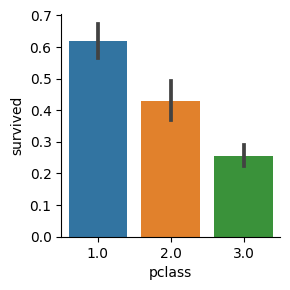

In [197]:
sns.catplot(x='pclass',y='survived',data=df,kind='bar',height=3)

<Axes: xlabel='survived', ylabel='count'>

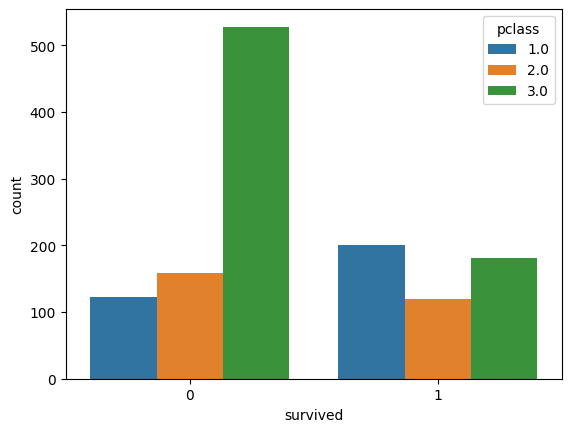

In [198]:
sns.countplot(x='survived', hue='pclass',data=df)

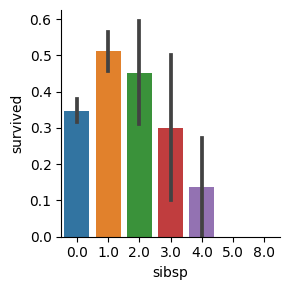

In [199]:
sns.catplot(x='sibsp',y='survived',data=df,kind='bar',height=3)

In [200]:
df[['parch','survived']].groupby(['parch'],as_index=False).agg(['count','mean'])

survived          
         count      mean
parch                   
0.0       1002  0.335329
1.0        170  0.588235
2.0        113  0.504425
3.0          8  0.625000
4.0          6  0.166667
5.0          6  0.166667
6.0          2  0.000000
9.0          2  0.000000

In [201]:
df[['embarked','survived']].groupby(['embarked'],as_index=False).agg(['count','mean'])

survived          
            count      mean
embarked                   
C             270  0.555556
Q             123  0.357724
S             914  0.332604

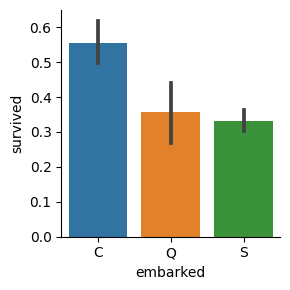

In [202]:
sns.catplot(x='embarked',y='survived',data=df , kind='bar',height=3)

In [203]:
pd.crosstab([df['sex'],df['survived']],df['pclass'],margins=True).style.background_gradient(cmap='summer_r')

In [204]:
pd.crosstab([df.embarked,df.pclass],[df.sex,df.survived],margins=True).style.background_gradient(cmap='summer_r')

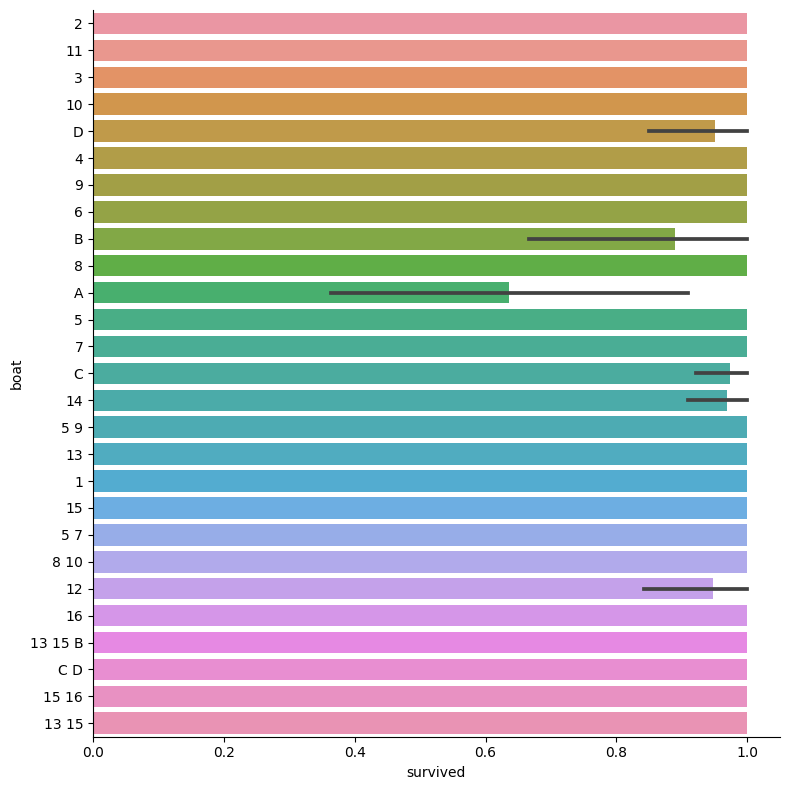

In [205]:
sns.catplot(x='survived',y='boat',data=df , kind='bar',height=8)

<Axes: xlabel='survived', ylabel='body'>

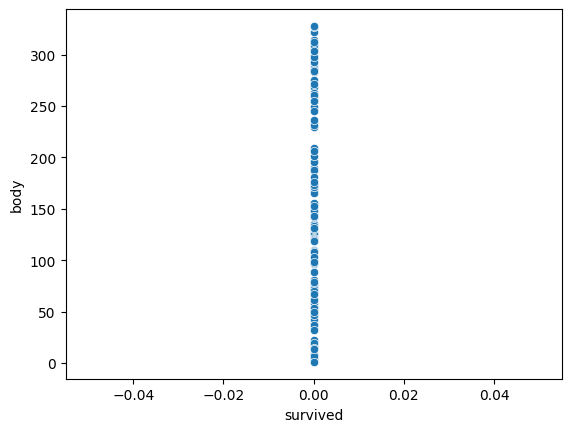

In [206]:
sns.scatterplot(x='survived',y='body',data=df)

<Axes: ylabel='count'>

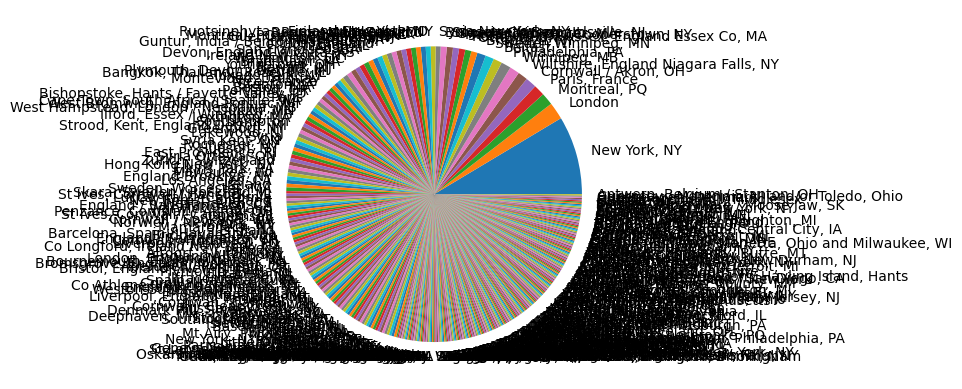

In [207]:
df['home.dest'].value_counts().plot(kind='pie')

#### obesrvation: 
* Body and boat will be dropped due to high missing values and bias
* Home.dest is the name of the destination for the respective passenger which again has high missing values and does not show significiant grouping. As it is acting as an identifier it will be dropped

In [208]:
df.drop(['boat', 'body', 'home.dest'],axis=1,inplace=True)

In [209]:
df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2})

In [210]:
df['fare'] = df['fare'].fillna(df.fare.median())
df['fare'].isnull().sum()
df['fare'] = df.fare.astype('int16')

In [211]:
df[df['age'].isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
15,1.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25,NaN,2,0
37,1.0,"Bradley, Mr. George ('George Arthur Brayton')",male,NaN,0.0,0.0,111427,26,NaN,2,1
40,1.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39,NaN,0,0
46,1.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31,NaN,2,0
59,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1293,3.0,"Williams, Mr. Howard Hugh 'Harry'",male,NaN,0.0,0.0,A/5 2466,8,NaN,2,0
1297,3.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7,NaN,2,0
1302,3.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7,NaN,0,0
1303,3.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14,NaN,0,0


In [212]:
df.survived.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

#### Creating new features

In [213]:
df['title'] = df['name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
#df['title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona',],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
df['title'] = df['title'].map(normalized_titles)
#dropping categories together
df.drop(['name','ticket'],axis=1,inplace=True)

In [214]:
# impute missing Age values using median of Title groups
title_ages = dict(df.groupby(['title'])['age'].median())

In [215]:
# create a column of the average ages
df['age_med'] = df['title'].apply(lambda x : title_ages[x])

In [216]:
df['age'].fillna(df['age_med'], inplace=True)
del df['age_med']

In [217]:
# Embarked missing value imputation
df['embarked'].fillna(method='backfill', inplace=True)

In [218]:
#Keeping cabin as separate category as U
df['cabin'] = df['cabin'].fillna('U')

In [219]:
df.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived,title
0,1.0,female,29.0000,0.0,0.0,211,B5,2,1,Miss
1,1.0,male,0.9167,1.0,2.0,151,C22 C26,2,1,Master
2,1.0,female,2.0000,1.0,2.0,151,C22 C26,2,0,Miss
3,1.0,male,30.0000,1.0,2.0,151,C22 C26,2,0,Mr
4,1.0,female,25.0000,1.0,2.0,151,C22 C26,2,0,Mrs


In [220]:
# size of families (including the passenger)
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [221]:
# map first letter of cabin to itself
df.cabin = df.cabin.map(lambda x: x[0])

In [222]:
df

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived,title,family_size
0,1.0,female,29.0000,0.0,0.0,211,B,2,1,Miss,1.0
1,1.0,male,0.9167,1.0,2.0,151,C,2,1,Master,4.0
2,1.0,female,2.0000,1.0,2.0,151,C,2,0,Miss,4.0
3,1.0,male,30.0000,1.0,2.0,151,C,2,0,Mr,4.0
4,1.0,female,25.0000,1.0,2.0,151,C,2,0,Mrs,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,1.0,0.0,14,U,0,0,Miss,2.0
1305,3.0,female,22.0000,1.0,0.0,14,U,0,0,Miss,2.0
1306,3.0,male,26.5000,0.0,0.0,7,U,0,0,Mr,1.0
1307,3.0,male,27.0000,0.0,0.0,7,U,0,0,Mr,1.0


In [223]:
df = df.convert_dtypes()

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   Int64   
 1   sex          1309 non-null   category
 2   age          1309 non-null   Float64 
 3   sibsp        1309 non-null   Int64   
 4   parch        1309 non-null   Int64   
 5   fare         1309 non-null   Int16   
 6   cabin        1309 non-null   string  
 7   embarked     1309 non-null   category
 8   survived     1309 non-null   Int16   
 9   title        1309 non-null   string  
 10  family_size  1309 non-null   Int64   
dtypes: Float64(1), Int16(2), Int64(4), category(2), string(2)
memory usage: 88.6 KB


In [225]:
df.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived,title,family_size
0,1,female,29.0,0,0,211,B,2,1,Miss,1
1,1,male,0.9167,1,2,151,C,2,1,Master,4
2,1,female,2.0,1,2,151,C,2,0,Miss,4
3,1,male,30.0,1,2,151,C,2,0,Mr,4
4,1,female,25.0,1,2,151,C,2,0,Mrs,4


In [226]:
target = 'survived'
categories = ['pclass','sex','cabin','embarked','title']
numerical = [i for i in df.columns if i not in categories]
numerical.remove(target)


In [227]:
numerical

['age', 'sibsp', 'parch', 'fare', 'family_size']

# Model building

In [228]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.impute import  SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score , roc_auc_score , f1_score , recall_score

In [229]:
target = 'survived'
X = df.drop(target ,axis=1)
y = df[target]

In [230]:
X.shape ,y.shape

((1309, 10), (1309,))

In [231]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=2)

In [232]:
X_train.shape ,X_test.shape

((981, 10), (328, 10))

In [233]:
numerical_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ]
    )

cat_pipeline=Pipeline(
    steps=[
    # ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OneHotEncoder(drop='first',handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
        ]
    )

preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline, numerical),
    ('categorical_pipeline',cat_pipeline , categories)
    ])

In [234]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [235]:
# a function to evaluate the model
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    roc_score = roc_auc_score(true, predicted)
    f_1_score = f1_score(true, predicted)
    recall = recall_score(true, predicted)

    return accuracy , roc_score , f_1_score , recall

In [236]:
models={
    'LogisticRegression':LogisticRegression(),
    'RidgeClassifier':RidgeClassifier(),
    'BernoulliNB':BernoulliNB(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    #'KNeighborsClassifier':KNeighborsClassifier(), # not suitable for this problem statement
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier()
}
model_list=[]
roc=[]
acc = []
f1 = []
rec = []
performance = []
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    accuracy , roc_score  , f_1_score , recall =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    roc.append(roc_score)
    acc.append(accuracy)
    f1.append(f_1_score)
    rec.append(recall)
    performance.append((list(models.keys())[i] , accuracy ))


    print('Model Training Performance')
    print("ROC:",roc_score)
    print("Accuracy:",accuracy)

    
    print('='*35)
    print('\n')

print("Best Model" , sorted(performance , key = lambda x: x[1])[-1])
model = models[sorted(performance , key = lambda x: x[1])[-1][0]]
print(model)

metrics = pd.DataFrame({"models": model_list , "accuracy" : acc , "roc_auc_score": roc , "f1_score" : f1 , "recall_score" : rec}).sort_values('accuracy',ascending=False)
print(metrics)

LogisticRegression
Model Training Performance
ROC: 0.8097229053943269
Accuracy: 0.8292682926829268


RidgeClassifier
Model Training Performance
ROC: 0.8184948352188883
Accuracy: 0.8353658536585366


BernoulliNB
Model Training Performance
ROC: 0.794269552385637
Accuracy: 0.7957317073170732


DecisionTreeClassifier
Model Training Performance
ROC: 0.7559435973110347
Accuracy: 0.7804878048780488


AdaBoostClassifier
Model Training Performance
ROC: 0.8068125922282341
Accuracy: 0.8201219512195121


GradientBoostingClassifier
Model Training Performance
ROC: 0.810296769962289
Accuracy: 0.8353658536585366


BaggingClassifier
Model Training Performance
ROC: 0.7562305295950155
Accuracy: 0.7835365853658537


RandomForestClassifier
Model Training Performance
ROC: 0.780209870470569
Accuracy: 0.7987804878048781


SVC
Model Training Performance
ROC: 0.8360386948680112
Accuracy: 0.8475609756097561


XGBClassifier
Model Training Performance
ROC: 0.7921790457452041
Accuracy: 0.8170731707317073


Best Mod

In [261]:
round(metrics.iloc[0]['accuracy']*100,2)

84.76

In [249]:
# no overfitting
y_train_pred = model.predict(X_train)
score = accuracy_score(y_train ,y_train_pred)
print(f"training accuracy is : {score*100 : .2f} % ")

training accuracy is :  82.06 % 
